***
#Bejgam Pranav
#E22CSEU1196
#B40
***

Task 1

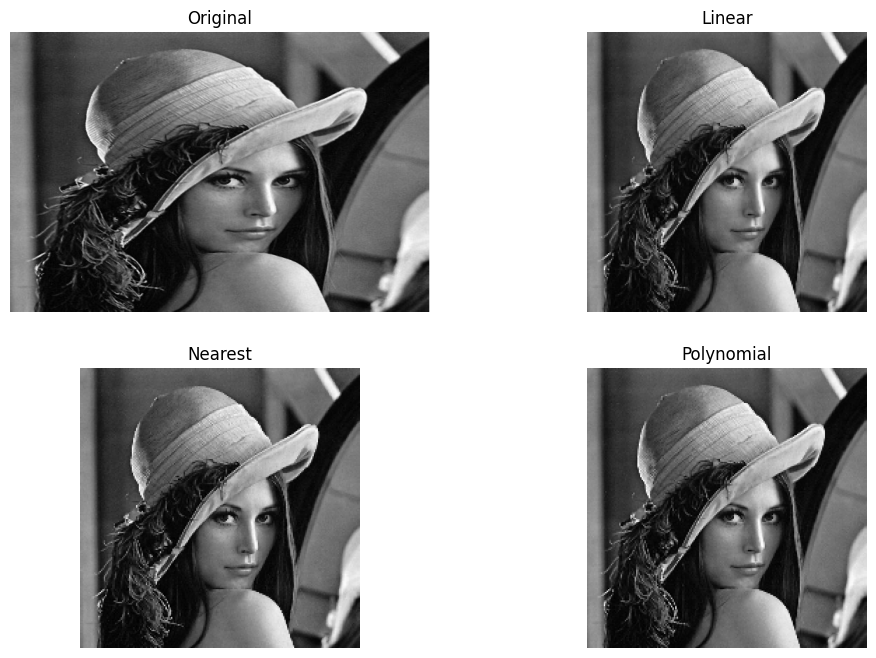

In [3]:
import cv2
from matplotlib import pyplot as plt

# Load image
image = cv2.imread('/content/Picture 1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper display

# Resize using different interpolation methods
resized_linear = cv2.resize(image, (200, 200), interpolation=cv2.INTER_LINEAR)
resized_nearest = cv2.resize(image, (200, 200), interpolation=cv2.INTER_NEAREST)
resized_polynomial = cv2.resize(image, (200, 200), interpolation=cv2.INTER_CUBIC)

# Display results
titles = ['Original', 'Linear', 'Nearest', 'Polynomial']
images = [image, resized_linear, resized_nearest, resized_polynomial]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.show()


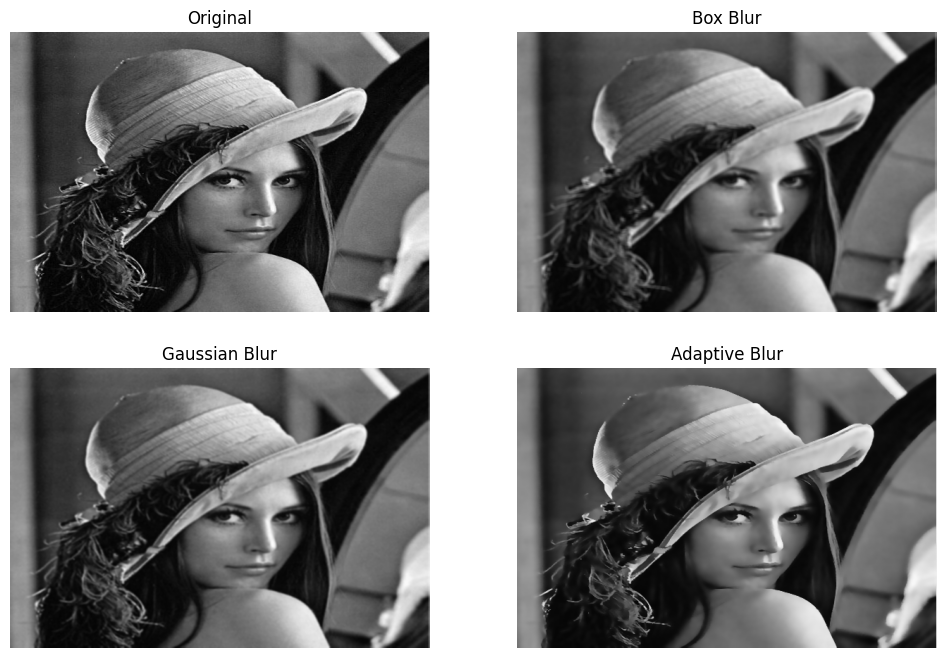

In [5]:
# Blurring techniques
box_blur = cv2.blur(image, (5, 5))
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
adaptive_blur = cv2.bilateralFilter(image, 9, 75, 75)

# Display results
titles = ['Original', 'Box Blur', 'Gaussian Blur', 'Adaptive Blur']
images = [image, box_blur, gaussian_blur, adaptive_blur]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.show()


TASK 2

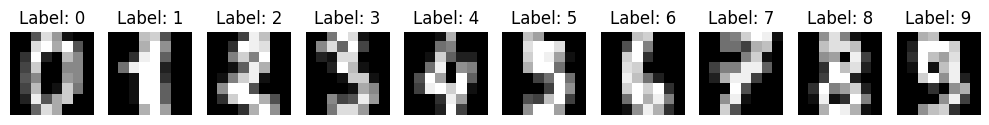

In [6]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
X, y = digits.data, digits.target

# Display first 10 digits
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
nb_model = GaussianNB()
rf_model = RandomForestClassifier()

nb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Metrics
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.83      0.86      0.84        28
           2       0.91      0.61      0.73        33
           3       0.91      0.85      0.88        34
           4       0.97      0.83      0.89        46
           5       0.90      0.94      0.92        47
           6       0.92      0.97      0.94        35
           7       0.69      0.97      0.80        34
           8       0.57      0.87      0.68        30
           9       0.96      0.65      0.78        40

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.84       360
weighted avg       0.88      0.85      0.85       360

Confusion Matrix:
 [[31  0  0  0  0  1  0  1  0  0]
 [ 0 24  0  0  0  0  0  0  3  1]
 [ 0  2 20  0  0  0  1  0 10  0]
 [ 0  0  1 29  0  1  0  0  3  0]
 [ 0  0  0  0 38  0  1  7  0  0]
 [ 0  0  0  1  0 44  1

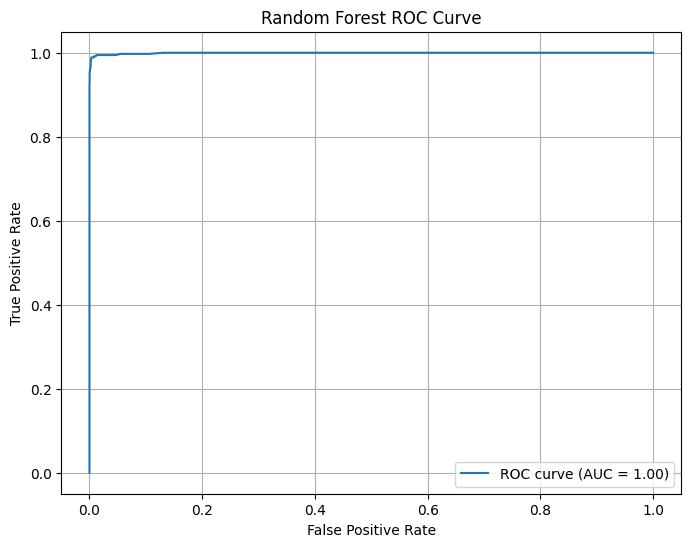

In [8]:
# Compute ROC and AUC
y_test_bin = label_binarize(y_test, classes=list(range(10)))
rf_probs = rf_model.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin.ravel(), rf_probs.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()
